<a href="https://colab.research.google.com/github/rsaeed15/rsaeed15/blob/main/fsi_importance_towards_cds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Title: 'Impact of State Fragility on Sovereign Credit Default Swap Pricing'
# Rifat Saeed


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [90]:
# Uploading spam csv file
from google.colab import files
uploaded = files.upload()

Saving cds_file_analysis2.csv to cds_file_analysis2.csv


In [111]:
# dataframe
import pandas as pd
df = pd.read_csv(r'cds_file_analysis2.csv',encoding='ISO-8859-1')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fsi             991 non-null    float64
 1   Year            991 non-null    int64  
 2   lfsi            991 non-null    float64
 3   GDP growth      991 non-null    float64
 4   E_I             991 non-null    float64
 5   Inflation       991 non-null    float64
 6   GDP             991 non-null    float64
 7   Total reserves  991 non-null    float64
 8   SP              991 non-null    float64
 9   tyr             991 non-null    float64
 10  VIX             991 non-null    float64
 11  lcds            991 non-null    float64
 12  cds             991 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 100.8 KB


In [93]:
df.corr()

,fsi,Year,lfsi,GDP growth,E_I,Inflation,GDP,Total reserves,SP,tyr,VIX,lcds,cds
fsi,1.000000,-0.044272,0.976328,0.133383,-0.071447,0.172899,-0.059501,0.149195,-0.044753,0.040923,0.013948,0.327942,0.045318
Year,-0.044272,1.000000,-0.050458,-0.100519,0.009824,-0.075911,0.045375,0.042099,0.919117,-0.808235,-0.362692,0.309927,0.050050
lfsi,0.976328,-0.050458,1.000000,0.124042,-0.084006,0.164565,-0.043895,0.140675,-0.053988,0.040209,0.008032,0.330310,0.058616
GDP growth,0.133383,-0.100519,0.124042,1.000000,0.151711,-0.050730,0.010122,0.127357,0.002941,0.241884,-0.310685,-0.052851,-0.089896
E_I,-0.071447,0.009824,-0.084006,0.151711,1.000000,-0.145881,-0.042483,0.095446,0.002153,-0.019554,-0.008310,-0.031360,-0.040195
Inflation,0.172899,-0.075911,0.164565,-0.050730,-0.145881,1.000000,-0.048837,-0.019071,-0.005803,0.072960,0.132729,0.068187,-0.027487
GDP,-0.059501,0.045375,-0.043895,0.010122,-0.042483,-0.048837,1.000000,0.586329,0.043714,-0.036730,-0.016933,-0.028431,-0.028200
Total reserves,0.149195,0.042099,0.140675,0.127357,0.095446,-0.019071,0.586329,1.000000,0.034963,-0.045197,-0.014818,-0.027542,-0.032127
SP,-0.044753,0.919117,-0.053988,0.002941,0.002153,-0.005803,0.043714,0.034963,1.000000,-0.639369,-0.271213,0.342064,0.037541
tyr,0.040923,-0.808235,0.040209,0.241884,-0.019554,0.072960,-0.036730,-0.045197,-0.639369,1.000000,0.168460,-0.154754,-0.054956


In [95]:
X=df.iloc[:,2:11].values ##### Input features
y=df.iloc[:,11].values  # Target variable

In [96]:
# Normalization
# perform a robust scaler transform of the dataset
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
X = trans.fit_transform(X)

In [97]:
# Splitting the data into training and testing sets
from sklearn import preprocessing
import numpy as np
#X_n = preprocessing.normalize(X) # changed to 2D numpy array
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [98]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
model = RandomForestRegressor(n_estimators =100, random_state = 42)
# Train the model on training data
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [100]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)

In [101]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [102]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

MAE:  0.37710340388768837
MSE:  0.38467115910337996


In [103]:
importances = list(100*model.feature_importances_)


In [104]:
print(importances)

[28.517165831886928, 5.046571729083336, 7.8357606091241605, 8.064589137528454, 11.288454313021719, 9.625876914632283, 24.15882186523347, 3.495386933934508, 1.967372665555139]


In [112]:
# Get the list of all column names from headers
labels=df.iloc[:,2:11]
column_headers = list(labels.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['lfsi', 'GDP growth ', 'E_I', 'Inflation', 'GDP', 'Total reserves', 'SP', 'tyr', 'VIX']


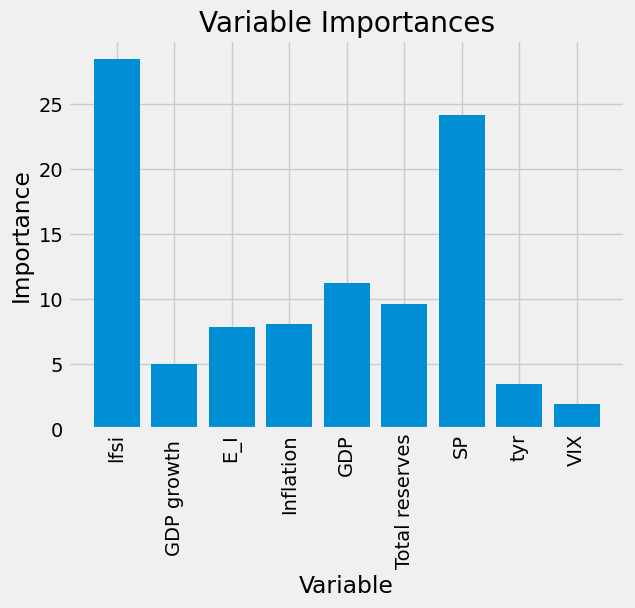

In [113]:
# Plotting Feature Importance
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');